In [2]:
# Imports
import spectral
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io
import matplotlib.pyplot as plt

import massimal.pipeline

In [16]:
importlib.reload(massimal.pipeline)

<module 'massimal.pipeline' from '/home/mha114/Dropbox/Python/massimal/src/massimal/pipeline.py'>

In [20]:
# Paths
calibration_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/')
radiance_cailbration_file = calibration_dir / 'RadiometricCal100121-278_081220.icp'
downwelling_calibration_file = calibration_dir / 'FLMS16638_Radiometric_Jan2021.dcp'
raw_image_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/0_raw')
raw_image_file = raw_image_dir / 'OlbergholmenN-7/OlbergholmenN_Pika_L_7.bil.hdr'
raw_image_dw_spec_file = raw_image_dir / 'OlbergholmenN-7/OlbergholmenN_downwelling_7_pre.spec.hdr'
radiance_dir = raw_image_dir.parent / '1_radiance'
reflectance_dir = raw_image_dir.parent / '2_reflectance'
radiance_image_file = radiance_dir / raw_image_file.name

In [17]:
rflc = massimal.pipeline.ReflectanceConverter(downwelling_calibration_file)

INFO: Non-empty downwelling calibration directory /media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301228-south-test_hsi/calibration/downwelling_calibration_spectra
INFO: Skipping unzipping of downwelling calibration file, assuming unzipping already done.


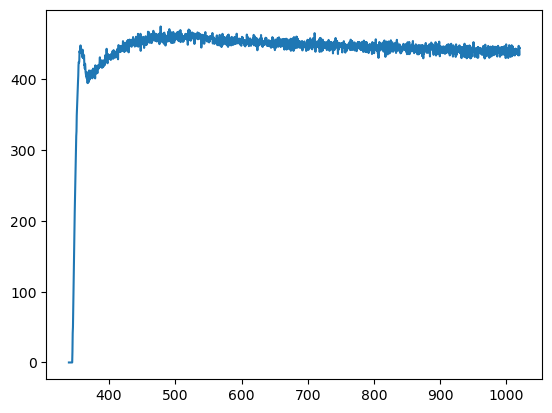

In [18]:
plt.plot(rflc._dw_wl, rflc._dw_dark_spec)

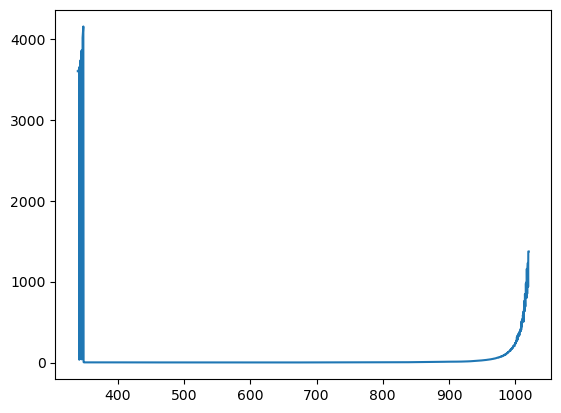

In [19]:
plt.plot(rflc._dw_wl, rflc._dw_conv_spec)

In [24]:
dw_spec,dw_wl,dw_meta = massimal.pipeline.read_envi(raw_image_dw_spec_file)
dw_spec = np.squeeze(dw_spec)

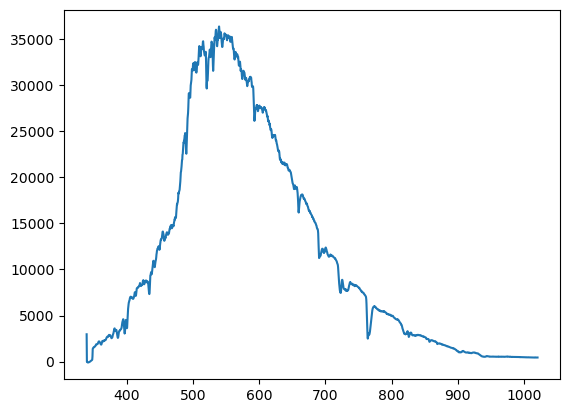

In [25]:
plt.plot(dw_wl,dw_spec)

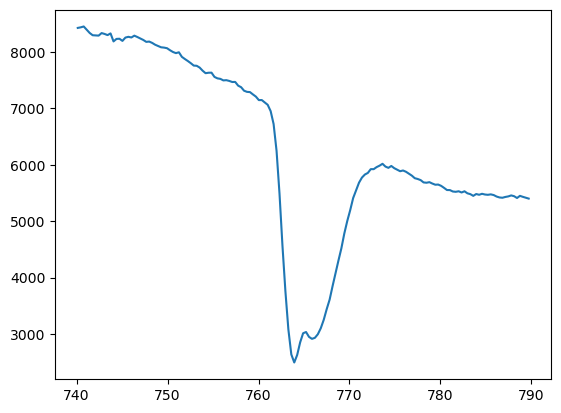

In [31]:
# wl_ind = (dw_wl>390) & (dw_wl<410)
# wl_ind = (dw_wl>970) & (dw_wl<1000)
wl_ind = (dw_wl>740) & (dw_wl<790)

plt.plot(dw_wl[wl_ind],dw_spec[wl_ind])

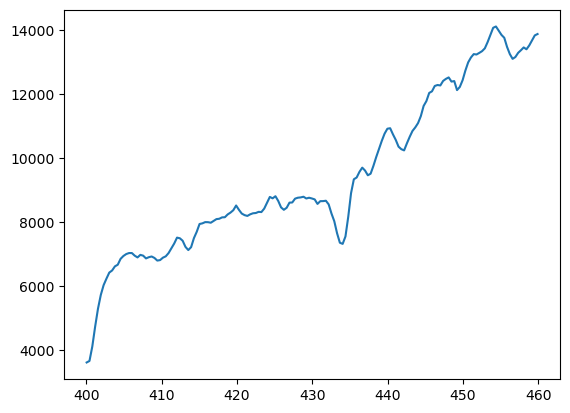

In [32]:
wl_ind = (dw_wl>400) & (dw_wl<460)
plt.plot(dw_wl[wl_ind],dw_spec[wl_ind])

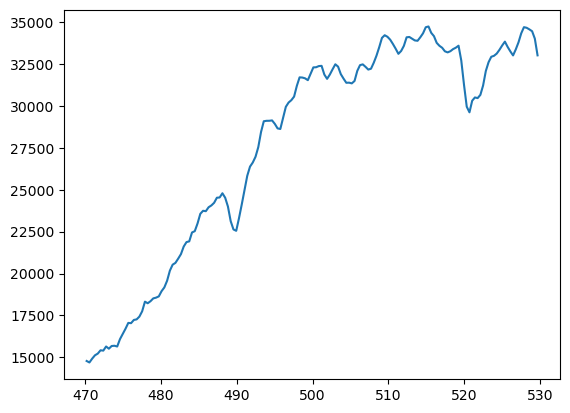

In [33]:
wl_ind = (dw_wl>470) & (dw_wl<530)
plt.plot(dw_wl[wl_ind],dw_spec[wl_ind])